# MNISTデータセット

In [1]:
# データセットインストール
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# データセットの確認
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [3]:
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

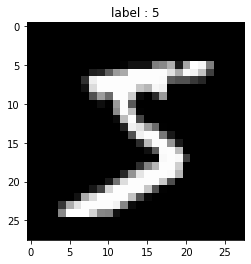

In [4]:
# 画像データの可視化
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [5]:
# インポート
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

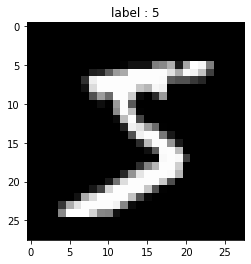

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

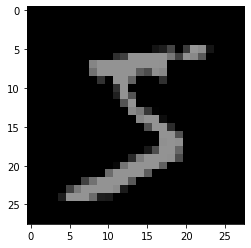

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

# 前処理

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [10]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train_1.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train_1.shape)

(48000, 784)
(12000, 784)
(48000, 10)


In [11]:
# ミニバッチ
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [12]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    break

3000
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([4, 8, 4, 1, 3, 4, 9, 1, 3, 1, 6, 4, 9, 1, 8, 8, 8, 4, 3, 6],
      dtype=uint8))


# 【問題1】重みの初期値を決めるコードの作成

In [13]:
np.random.seed(0)
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

In [14]:
print(W1.shape)

(784, 400)


# 【問題2】フォワードプロパゲーションの実装

三層のニューラルネットワークの フォワードプロパゲーション を作成してください。<br>
以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。<br>
各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

In [ ]:
「1層目」


$X$ : 特徴量ベクトル (batch_size=20, n_features=748)
$W_1$ : 1層目の重み (n_features=748, n_nodes1=400)
$B_1$ : 1層目のバイアス (n_nodes1=400,)
$A_1$ : 出力 (batch_size=20, n_nodes1=400)

「1層目の活性化関数」

$f()$ : 活性化関数=tanh()
$Z_1$ 出力 (batch_size=20, n_nodes1=400)

「2層目」

$W_2$ : 2層目の重み (n_nodes1=400, n_nodes2=200)
$B_2$ : 2層目のバイアス (n_nodes2,=200)
$A_2$ : 出力 (batch_size=20, n_nodes2=200)

「2層目の活性化関数」

$f()$ : 活性化関数=tanh()
$Z_2$ 出力 (batch_size=20, n_nodes2=200)

「3層目（出力層）」

$W_3$ : 3層目の重み (n_nodes2=200, n_output=10)
$B_3$ : 3層目のバイアス (n_output=10,)
$A_3$ : 出力 (batch_size=20, n_output=10)

「3層目の活性化関数」

$softmax()$ : ソフトマックス関数
$Z_3$ 出力 (batch_size20, n_output=10)
$Z_3$ は各ラベル（0〜9）に対する確率の配列である。

In [15]:
# 活性化関数（フォワードプロバゲーション）
def sigmoid(a):
    z_pred = 1/(1+np.exp(-1*a))
    return z_pred

def tanh(a):
    z_pred = np.tanh(a)
    return z_pred

In [16]:
# ソフトマックス関数
def softmax(a):
    z_pred = (np.exp(a).T/np.exp(a).sum(axis=1)).T
    
    return z_pred

In [38]:
a = np.random.uniform(0, 10,(20, 10))
print(a)

[[4.23449925 9.18145853 3.89686249 2.08826317 2.08910873 8.86523278
  0.65827815 8.55316516 4.63009139 4.81382439]
 [6.65281191 3.71861868 2.6808774  9.71205683 8.80422591 1.30629418
  6.30599722 3.925944   6.55363474 7.73716113]
 [6.57563827 1.94291795 9.29190638 6.07391201 3.95716376 7.25341882
  8.61932357 9.32056265 2.18818675 5.90599628]
 [2.09382159 8.77435943 4.21768849 3.96805011 1.45888048 7.88626854
  8.34391087 6.89324747 8.71576345 2.84106478]
 [4.23274975 7.00723962 1.71490531 9.86663928 8.40779561 0.21568127
  8.82114857 0.48427204 4.77894154 2.52321113]
 [6.52698263 2.60325107 2.2883042  8.80453936 1.30325888 1.50937787
  4.94299192 6.16440185 8.50700599 4.00132859]
 [2.43051728 6.13954192 4.16554729 9.62724595 7.39286055 3.36297721
  2.16011279 4.07110427 3.39117758 1.56643395]
 [0.67916588 3.3980468  0.88941822 2.42248139 7.67254624 0.86977043
  2.30585639 0.62069279 8.06017491 6.30991279]
 [9.84101512 5.98740593 3.27492824 0.87974936 8.98363945 4.7584101
  1.69208808 

In [18]:
np.exp(a).sum(axis=0).shape

(10,)

In [39]:
np.exp(a).sum(axis=0)
softmax(a)

array([[3.08957133e-03, 4.34845865e-01, 2.20426825e-03, 3.61243249e-04,
        3.61548833e-04, 3.16956927e-01, 8.64500276e-05, 2.31990929e-01,
        4.58882727e-03, 5.51437046e-03],
       [2.80735659e-02, 1.49277260e-03, 5.28820571e-04, 5.98288657e-01,
        2.41348615e-01, 1.33762517e-04, 1.98462234e-02, 1.83668169e-03,
        2.54229232e-02, 8.30279782e-02],
       [2.34806990e-02, 2.28426325e-04, 3.55116846e-01, 1.42172002e-02,
        1.71207187e-03, 4.62452761e-02, 1.81247602e-01, 3.65440379e-01,
        2.91920798e-04, 1.20195774e-02],
       [3.94635388e-04, 3.14424766e-01, 3.30049974e-03, 2.57136148e-03,
        2.09143615e-04, 1.29367080e-01, 2.04444445e-01, 4.79247885e-02,
        2.96530136e-01, 8.33143135e-04],
       [2.16362165e-03, 3.46838228e-02, 1.74459801e-04, 6.05269028e-01,
        1.40728058e-01, 3.89574610e-05, 2.12763736e-01, 5.09610222e-05,
        3.73584974e-03, 3.91505735e-04],
       [5.25680131e-02, 1.03912214e-03, 7.58380073e-04, 5.12686505e-01,
   

# 【問題3】交差エントロピー誤差の実装

$$L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})$$

yij: j番目のサンプルの k番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）<br>
z3ij : j 番目のサンプルの k 番目のクラスの確率（スカラー）<br>
nb : バッチサイズ、batch_size<br>
nc : クラスの数、n_output（今回のMNISTでは10）<br>
サンプル1つあたりの誤差が求まります。<br>

In [20]:
def loss_entropy(z3,y_train_batch):
    loss = 1/z3.shape[0]*(y_train_batch*(np.log(z3))).sum()
    return loss

In [22]:
loss_entropy(clf.z3,np.random.uniform(0, 10,(20, 10)))

NameError: name 'clf' is not defined

In [23]:
np.random.uniform(0, 10,(600, 10)).shape

(600, 10)

In [24]:
clf.z3.shape[0]

NameError: name 'clf' is not defined

# 【問題4】バックプロパゲーションの実装

In [21]:
alpha = 0.01

$$\frac{\partial L}{\partial A_3} = Z_{3} - Y$$

In [22]:
def L_A3(z3,y_train_batch):
    LA3 = z3 - y_train_batch
    return LA3

$$\frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3\_j}}$$

In [23]:
def L_B3(b3,z3,LA3):
    L_B3 = (lam/z3.shape[0])*b3 + 1/z3.shape[0]*(LA3 @ z3).T
    return L_B3

$$\frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}$$

In [24]:
def L_W3(z2,LA3):
    LW3 = z2.T@LA3
    return LW3

$$\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T$$

In [25]:
def L_z2(LA3,W3):
    LZ2 = LA3*W3.T
    return LZ2

$$A_3 = Z_2 \cdot W_3 + B_3$$

In [26]:
def A3(z2,w3,b3):
    A3 = z2*w3 + b3
    return A3

$$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}$$

In [27]:
def L_A2(LZ2,a2):
    LA2 = LZ2*(1-np.tanh(a2)^2)
    return LA2

$$\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2\_j}}$$

In [28]:
def L_B2(b2,z2,LA2):
    L_B2 = (lam/z2.shape[0])*b2 + 1/z2.shape[0]*(LA2 @ z2).T
    return L_B2

$$\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T$$

In [29]:
def L_z1(LA2,W2):
    LZ1 = LA2*W2.T
    return LZ1

$$\frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}$$

In [30]:
def L_W2(z1,LA2):
    LW2 = z1.T@LA2
    return LW2

$$\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}$$

In [31]:
def L_A1(LZ1,a1):
    LA1 = LZ1*(1-np.tanh(a1)^2)
    return LA1

$$\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}$$

In [32]:
def L_B1(b1,z1,LA1):
    L_B1 = (lam/z1.shape[0])*b1 + 1/z1.shape[0]*(LA1 @ z1).T
    return L_B1

$$\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}$$

In [33]:
def L_W1(x,LA1):
    LW1 = x.T@LA1
    return LW1

In [60]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self,num_iter = 15,lr = 0.01,lam = 0.01, verbose = True):
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.lam = lam
        np.random.seed(0)
        n_features = 784
        n_nodes1 = 400
        sigma = 0.005 # ガウス分布の標準偏差
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        n_nodes2 = 200
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        n_output = 10
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        self.B1 = np.zeros(n_nodes1)
        self.B2 = np.zeros(n_nodes2)
        self.B3 = np.zeros(n_output)
        self.alpha = 0.001
        self.rec_loss = [] 
        self.rec_val_loss = [] 
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
            for mini_X_train, mini_y_train in get_mini_batch:
                self.a1 = mini_X_train@self.W1 + self.B1
                self.z1 = np.tanh(self.a1)
                self.a2 = self.z1@self.W2 + self.B2
                self.z2 = np.tanh(self.a2)
                self.a3 = self.z2@self.W3 + self.B3
                self.z3 = softmax(self.a3)
                # バックプロパゲーション
                self.back_pro(mini_X_train, mini_y_train)
            self.loss_entropy(mini_y_train)
            self.val_loss_entropy()

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass
    def back_pro(self,mini_X,mini_y):
        LA3 = self.z3 - mini_y
        L_B3 = (self.lam/self.z3.shape[0])*self.B3 + 1/self.z3.shape[0]*(LA3 * self.z3)
        LW3 = self.z2.T@LA3
        LZ2 = LA3@self.W3.T
        
        self.W3 = self.W3 - self.alpha*LW3
        self.B3 = self.B3 - self.alpha*L_B3.mean(axis=0)
        
        LA2 = LZ2*(1-np.tanh(self.a2)**2)
        L_B2 = (self.lam/self.z2.shape[0])*self.B2 + 1/self.z2.shape[0]*(LA2 * self.z2)
        LW2 = self.z1.T@LA2
        LZ1 = LA2@self.W2.T
        
        self.W2 = self.W2 - self.alpha*LW2
        self.B2 = self.B2 - self.alpha*L_B2.mean(axis=0)   
        
        LA1 = LZ1*(1-np.tanh(self.a1)**2)
        L_B1 = (self.lam/self.z1.shape[0])*self.B1 + 1/self.z1.shape[0]*(LA1 * self.z1)
        LW1 = mini_X.T@LA1
        
        self.W1 = self.W1 - self.alpha*LW1
        self.B1 = self.B1 - self.alpha*L_B1.mean(axis=0)
        
    
    def softmax(self,a):
        z_pred = (np.exp(a).T/np.exp(a).sum(axis=1)).T
    
        return z_pred    
    
    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.z3.shape[0]*(y_train_batch*(np.log(self.z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = softmax(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = softmax(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

In [61]:
from sklearn import metrics

# 【問題5】推定
# 【問題6】学習と推定

In [62]:
clf = ScratchSimpleNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)
y_pred,y_pred_index  = clf.predict(X_val)
print("学習結果" + str(metrics.accuracy_score(np.argmax(y_val, axis = 1), y_pred_index)))


学習結果0.9650833333333333


In [63]:
print(clf.rec_loss)

[0.7400874328599356, 0.6508383726293522, 0.4987703515321366, 0.38943724831084947, 0.2946648289666182, 0.22270432735278192, 0.17182014026920447, 0.13800228024317793, 0.11580743523697393, 0.09992539318679122, 0.08765609139065056, 0.07792682482965602, 0.07011826356037289, 0.06373921870835692, 0.05840981270798942]


In [64]:
print(clf.loss)

0.05840981270798942


In [65]:
print(clf.rec_val_loss)

[0.6436671632618169, 0.40700725336474897, 0.33729119238629574, 0.2922659486046976, 0.2551946173773563, 0.22398967647781576, 0.19829071267648124, 0.1783526472846723, 0.16320301600047765, 0.15141092963160893, 0.1419654038177141, 0.13424901322677787, 0.12786295038403694, 0.12250135604660976, 0.11791083315919275]


In [66]:
print(clf.val_loss)

0.11791083315919275


# 【問題7】学習曲線のプロット

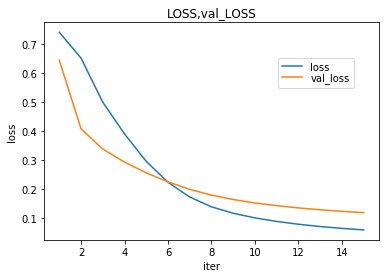

In [70]:
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='medium')
plt.show()